# Program 4

In [1]:
import time
import random
import heapq
import matplotlib.pyplot as plt

## Heapify Benchmark

Best Case -> When the input is already a valid heap, so no elements need to be moved. This would be a sorted list.

Worst Case -> When the input array needs max amount of rearrangement to become a heap. This would be a reverse sorted list. 

In [31]:
def generate_best_case_input(n):
    """
    Returns a sorted list with n elements
    """
    elements = []
    for i in range(n):
        elements.append(i)
    return elements

In [32]:
def generate_worst_case_input(n):
    """
    Returns a reverse sorted list with n elements
    """
    elements = []
    for i in range(n, -1, -1):
        elements.append(i)
    return elements

In [33]:
def generate_random_case_input(n):
    """
    Generates a random list of n elements
    """
    elements = []
    for i in range(n):
        rand_value = random.randint(0,100)
        elements.append(rand_value)
    return elements

In [38]:
def benchmark_heapify(elements):
    """
    Returns the runtime of the heapify algorithm for the elements passed in
    """
    start = time.time()
    heapq.heapify(elements)
    end = time.time()
    return end - start

In [35]:
def calculate_run_times_heapify(num_elements, type):
    """
    Returns a list of run times for every element passed in the num_elements list
    Type: best / worst / random case
    """

    generate_input = generate_best_case_input
    if type == "worst":
        generate_input = generate_worst_case_input
    if type == "random":
        generate_input = generate_random_case_input


    run_times = []
    for n in num_elements:
        input = generate_input(n)
        run_times.append(benchmark_heapify(input))

    return run_times

In [36]:
elements_to_test = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
heapify_best_case = calculate_run_times_heapify(elements_to_test, "best")
heapify_worst_case = calculate_run_times_heapify(elements_to_test, "worst")
heapify_random_case = calculate_run_times_heapify(elements_to_test, "random")

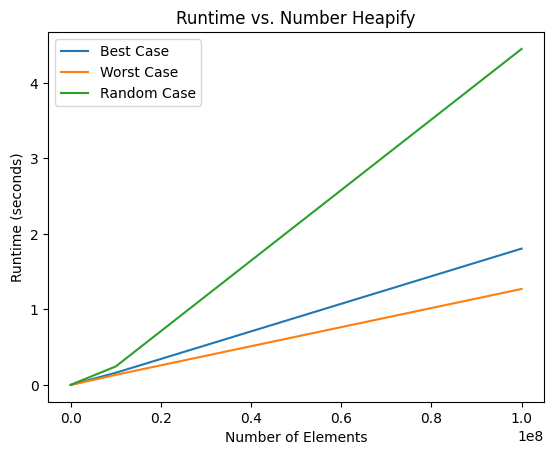

In [37]:
plt.plot(elements_to_test, heapify_best_case, label="Best Case")
plt.plot(elements_to_test, heapify_worst_case, label="Worst Case")
plt.plot(elements_to_test, heapify_random_case, label="Random Case")
plt.xlabel('Number of Elements')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Number Heapify')
plt.legend()
plt.show()

## Heappush Benchmark

## Heappop Benchmark

## Heapreplace Benchmark

In [2]:
def generate_input(n):
    """
    Returns a sorted list with n elements
    """
    elements = []
    for i in range(n):
        elements.append(i)
    return elements

In [3]:
def benchmark_heapreplace(heap, item):
    """
    Returns the runtime of the heapreplace algorithm for the elements passed in
    """
    time_ns_start = time.perf_counter_ns()
    heapq.heapreplace(heap, item)
    time_ns_end = time.perf_counter_ns()
    return time_ns_end  - time_ns_start

In [4]:
def calculate_average_benchmarks_heapreplace(num_elements):
    """
    Returns a list of run times for every element passed in the num_elements list
    Type: best / worst / random case
    """
    
    data = generate_input(num_elements)
    heap = heapq.heapify(data)
    best_benchmark_total = 0
    average_benchmark_total = 0
    worst_benchmark_total = 0
   
        #Worst case for heapreplace is adding a value that is higher than the rest
    worst_benchmark_value = data[len(data) - 1] + 1
        #Best case for heapreplace is using a value lower than the rest
    best_benchmark_value = data[0]
        #Average is adding a value in the middle
    average_benchmark_value = data[len(data) // 2]

    data.remove(average_benchmark_value)



    heap1 = data.copy()
    best_benchmark = benchmark_heapreplace(heap1, best_benchmark_value)
    heap2 = data.copy()
    worst_benchmark = benchmark_heapreplace(heap2, worst_benchmark_value)
    heap3 = data.copy()
    average_benchmark = benchmark_heapreplace(heap3, average_benchmark_value)

        
    return (best_benchmark, worst_benchmark, average_benchmark)

In [5]:
elements_to_test = [100, 1000, 10000, 100000, 1000000, 10000000, 20000000,30000000]
heapreplace_best_case = []
heapreplace_worst_case = []
heapreplace_average_case = []
for n in elements_to_test:
    best_benchmark, worst_benchmark, average_benchmark = calculate_average_benchmarks_heapreplace(n)
    heapreplace_best_case.append(best_benchmark)
    heapreplace_worst_case.append(worst_benchmark)
    heapreplace_average_case.append(average_benchmark)    
    

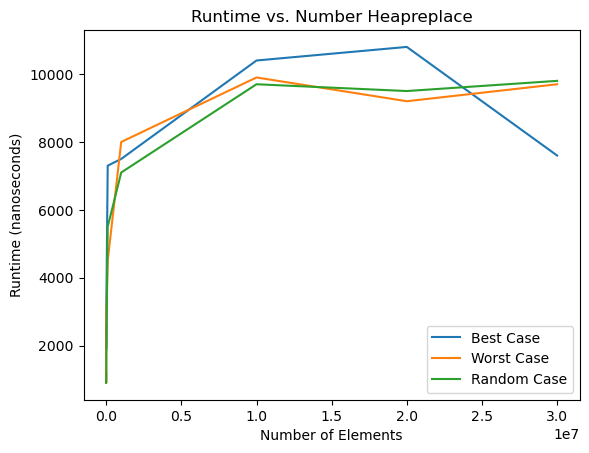

In [6]:
plt.plot(elements_to_test, heapreplace_best_case, label="Best Case")
plt.plot(elements_to_test, heapreplace_worst_case, label="Worst Case")
plt.plot(elements_to_test, heapreplace_average_case, label="Random Case")
plt.xlabel('Number of Elements')
plt.ylabel('Runtime (nanoseconds)')
plt.title('Runtime vs. Number Heapreplace')
plt.legend()
plt.show()

In [17]:
def find_k_smallest(collection, k):
    """
    Essentially what we are doing is taking advantage of the fact that this is a min heap. By popping the heap k times and appending it to a list
    We are capturing the k smallest elements in the collection.
    Collection: collection to find the k'th smallest items in
    k: the place of the highest value to return.
    Return: A list of the lowest k values
    """
    # Convert Collection to heap
    heapq.heapify(collection)
    kth_smallest = []
    for i in range(k):
        kth_smallest.append(heapq.heappop(collection))
    return kth_smallest

In [20]:
collection = [7, 10, 4, 3, 20, 15]
k = 4
k_smallest = find_k_smallest(collection, k)
print("k smallest elements:", k_smallest)

k smallest elements: [3, 4, 7, 10]
